# Team Assignment
---



##Introduction

The following project and its contents have been created by **Saeid Gholami, Kento Minagawa, Bruno Couto, Rishabh Dua, and Chirag Yadav** under the guidance and supervision of **Mohammad Soltanieh-ha**. Reproduction and/or distribution of contents in this project for financial gains or otherwise is strictly prohibited without the written permission of the team members or the instructor. Violators will be prosecuted with full extend of law along with any equitable monetary fines.


### Movie Industry Dataset

The dataset that we have selected has a total of 6820 movies. Here,  there are 220 movies which are randomly selected every year for three decades from 1986 to 2016 for analysis and a group of attributes are measured/recorded. Each movie has the following listed attributes represented against columns:


* **Budget:** This attribute gives the overall budget for a movie. There are some movies don't have this data, so for them the budget is 0
* **Company:** This attribute gives the name of the production company.
* **Country:** This attribute gives the name of the country in which the movie was produced
* **Director:** This attribute gives the name of the director for the listed movie.
* **Genre:**  This attribute gives the main Genre for the movie.
* **Gross:** This attribute gives us the total revenues earned in the the movie's lifetime.
* **Name:** The name of the movie
* **Rating:** The rating for the movie in terms of (R, PG, etc.)
* **Released:** This attribute gives us the release date for the movie(YYYY-MM-DD)
* **Runtime:** This attribute gives us the runtime for the movie.
* **Score:** IMDb user rating
* **Votes:** Total number of user votes
* **Star:** Main actor/actress in the movie
* **Writer:** This attribute gives us information on the writer for the movie
 


##Problem Definition

### The Problem

Now we have data set. But we have not seen any relationship among these columns. For example which variable has the strongest relationship with the revenue. In the business world, we have to predict how successfull a new product or service will be based on the history and the trend. So our goal is to create a regression model that predicts the gross revenue of a particular film coming out.


### Goals

In this presentation, we are going to predict the revenue of The Avengers: Endgame. In other words, we are not going to set a standard principle of profitable movies. For example, saying ‘if you want to make a profitable movie, use Steven Spielberg as director and Robert Downey Jr. as the main actor then launch during summer holiday season with 3D.’ This is not our goal.  In addition, because all gross revenue data is from the US only, we used data from US-based films.

## Loading the data

Importing libraries and connecting to the Team Drive

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
plt.rc('font', size=14)

import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
# Mounting Google Drive folder
drive.mount('/gdrive');

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


Reading the data from the CSV file on the Team Drive

In [0]:
movies = pd.read_csv('/gdrive/Team Drives/Kung Fu Pandas/dataset/movies.csv', encoding='latin-1', parse_dates=True)
movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


##Data Exploration

Checking values for all the columns in the dataset

In [0]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
budget      6820 non-null float64
company     6820 non-null object
country     6820 non-null object
director    6820 non-null object
genre       6820 non-null object
gross       6820 non-null float64
name        6820 non-null object
rating      6820 non-null object
released    6820 non-null object
runtime     6820 non-null int64
score       6820 non-null float64
star        6820 non-null object
votes       6820 non-null int64
writer      6820 non-null object
year        6820 non-null int64
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB


Generating statistical descriptors for each numerical column

In [0]:
movies.describe()

,budget,gross,runtime,score,votes,year
count,6.820000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,2.458113e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.702254e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,0.000000e+00,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,0.000000e+00,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,1.100000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,3.200000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


**Movie Budget:**

In [0]:
print("For {} movies there is no data available with respect to their budget.".format(movies[(movies.budget==0)].name.count()))

For 2182 movies there is no data available with respect to their budget.


In [0]:
print("For the rest of the data set (i.e eliminating these {} movies), which has {} movies:".format(movies[(movies.budget==0)].name.count(), movies[(movies.budget>0)].name.count()))

For the rest of the data set (i.e eliminating these 2182 movies), which has 4638 movies:


* Maximum Movie Budget is  $300 M
* Minimum Movie Budget is  \$6000
* Average Movie Budget is \$36 M
* Standard Deviation for the sub-set is \$39.9 M

**Gross Revenue:**
* Total indusrty made \$228.5 Bn in revenue
* Total industry had \$60.8 Bn gross profit
* Maximum revenues earned is \$936 M
* Minimum revenues earned is \$70
* The average revenues earned is \$33 M 
* 4460 Movies had a profit and 2340 movies showed a loss
* Gross revenue is higly correlated with initial budget and the company behind the movie

**Gross Revenue in Month:**
* In entire industry, the average gross revenue per movie is the highest for the movies released in June (\$59M), December (\$54.3M), or July (\$51.9M)
* Marvel Studios tend to realease its movies in May, August, or November.
* The average gross revenues per movie in Marvel studion is highest for movies released in May (\$474.8M) and lowest for November (\$219M)

**Run Time:**

* Maximum Run-time is 366 minutes
* Minimum Run-time is 50 minute
* Average Run-time us 106 minutes

* The movie with the longest Run-time i.e. 366 minutes :- The Best of Youth
* The movie with the shortest Run-time i.e 50 minutes :- Wings of Courage

**IMDB Reviews:**

* Maximum rating is 9.3
* Minimum rating is 1.5
* Average rating is 6.4
* Median rating is 6.4

**Number of Votes:**

* Maximum votes earned are 1.8 Million
* Minimum votes earned are 27
* Average votes earned are 71,219


**Movie Genre:**

* Genre under which most movies were produced is Comedy with 2080 movies
* Genre under which least movies were produced is Western and War, both with only 2 movies


**Other data:**

* There are 57 unique countries from where the movies are originated.
* United States produced the most of these movies in this list with 4,872 movies
* There are 14 different countries which produced just one movie in the data set.
* Woody Allen directed 33 movies, which was the most by an indiviual.
* There are 2,179 unique companies in the provided data-set.
* Universal Pictures produced the most movies in the data set with 302 movies.


In [0]:
movies [movies.runtime==movies.runtime.max()].name.describe()

count                     1
unique                    1
top       The Best of Youth
freq                      1
Name: name, dtype: object

In [0]:
movies [movies.runtime==movies.runtime.min()].name.describe()

count                    1
unique                   1
top       Wings of Courage
freq                     1
Name: name, dtype: object

In [0]:
movies.country.describe()

count     6820
unique      57
top        USA
freq      4872
Name: country, dtype: object

In [0]:
movies.country.value_counts().head(10)

USA          4872
UK            698
France        283
Canada        150
Germany       134
Australia      82
Japan          68
Spain          56
Italy          51
Ireland        44
Name: country, dtype: int64

In [0]:
movies.company.describe()

count                   6820
unique                  2179
top       Universal Pictures
freq                     302
Name: company, dtype: object

In [0]:
movies[(movies.budget!=0)].budget.describe()

count    4.638000e+03
mean     3.614560e+07
std      3.996947e+07
min      6.000000e+03
25%      1.000000e+07
50%      2.300000e+07
75%      4.600000e+07
max      3.000000e+08
Name: budget, dtype: float64

In [0]:
movies.genre.value_counts().head(10)

Comedy       2080
Drama        1444
Action       1331
Crime         522
Adventure     392
Biography     359
Animation     277
Horror        277
Mystery        38
Fantasy        32
Name: genre, dtype: int64

In [0]:
movies.director.value_counts().head(10)

Woody Allen          33
Clint Eastwood       24
Steven Soderbergh    21
Steven Spielberg     21
Ron Howard           20
Ridley Scott         19
Joel Schumacher      19
Barry Levinson       18
Spike Lee            18
Stephen Frears       17
Name: director, dtype: int64

### Exploratory Data Analysis using Scatter Plots 

**Adjusting USD values to Millions**

In [0]:
movies['gross'] = movies['gross'] / 10**6
movies['budget'] = movies['budget'] / 10**6

**Industry Gross Revenue, and Profit_Loss**

In [0]:
movies['gross'].sum()

228455.19115799997

In [0]:
Profit_Loss = movies['gross'] - movies ['budget']
Profit_Loss.sum()

60811.890928999994

**Number of profitable movies**

In [0]:
Profit_Loss[('budget' != 0) & (Profit_Loss > 0)].count()

4460

**Industry Revenue Per Month**

* In entire industry, the average gross revenue per movie is the highest for the movies released in June (\$59M), December (\$54.3M), or July (\$51.9M)

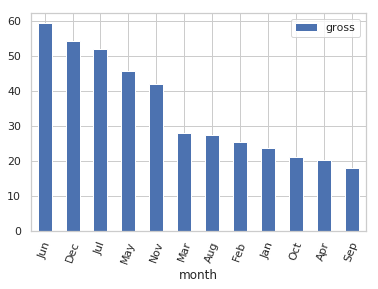

In [0]:
movies['month'] = pd.DatetimeIndex(movies['released']).strftime("%b")

monthly_avg_gross = movies.pivot_table(values='gross', index=['month'], aggfunc='mean').sort_values('gross', ascending=False)
monthly_avg_gross.plot(kind='bar');
plt.xticks(rotation=70);

**Marvel Studios Revenue Per Month**
* Marvel Studios tend to realease its movies in May, August, or November.
* The average gross revenues per movie in Marvel studion is highest for movies released in May (\$474.8M) and lowest for November (\$219M)

In [0]:
Marvel_monthly_gross = movies[(movies.company== 'Marvel Studios')].pivot_table(values='gross', index=['month'], aggfunc='mean').sort_values('gross', ascending=False)
Marvel_monthly_gross

,gross
month,
May,474.86553
Aug,333.17660
Nov,219.50203


** Scatter Plot Year x Gross Revenue **

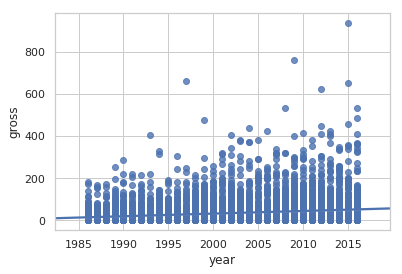

In [0]:
sns.regplot('year', 'gross', data=movies);

** Scatter Plot Runtime x Gross Revenue **

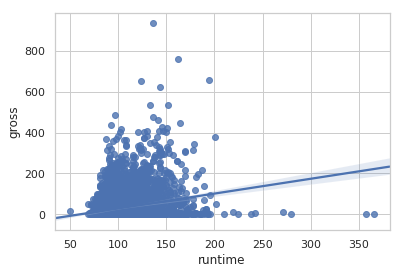

In [0]:
sns.regplot('runtime', 'gross', data=movies);

** Scatter Plot Score x Gross Revenue **

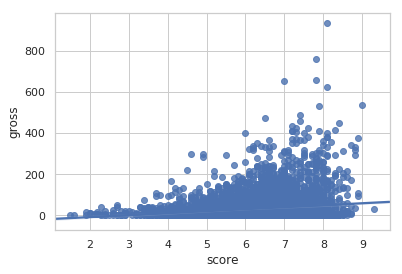

In [0]:
sns.regplot('score', 'gross', data=movies);

** Scatter Plot Budget x Gross Revenue **

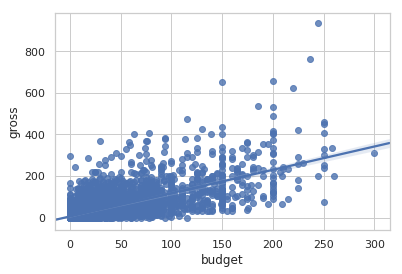

In [0]:
sns.regplot('budget', 'gross', data=movies);

**Heatmap for data correlations**

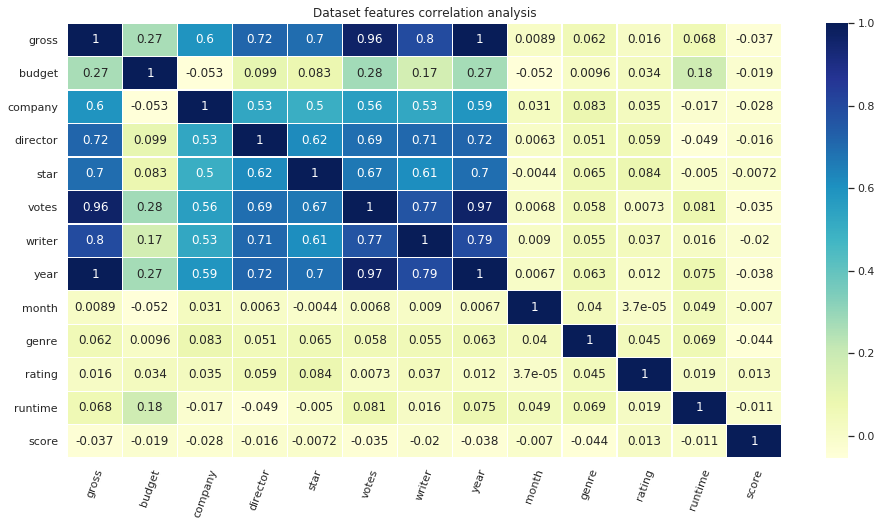

In [0]:
plt.figure(figsize=(16, 8))

heatmap_data = movies[['gross', 'budget', 'company', 'director', 'star', 'votes', 'writer', 'year', 'month', 'genre', 'rating', 'runtime', 'score']]

heatmap_corr = heatmap_data.apply(lambda x: pd.factorize(x)[0]).corr()

sns.heatmap(heatmap_corr, linewidths=.2, cmap="YlGnBu", annot=True)

plt.title('Dataset features correlation analysis')

plt.xticks(rotation=70);

##Data Analysis

**Identify TOP 10 companies by Mean Gross Revenue**

In [0]:
top10_company = movies.pivot_table(values='gross', index=['company'], aggfunc='mean').sort_values('gross', ascending=False).head(10)
top10_company

,gross
company,
Lucasfilm,442.329167
Marvel Studios,381.663254
Fairview Entertainment,364.001123
Illumination Entertainment,336.045770
Color Force,276.882865
Pixar Animation Studios,270.168731
Marvel Entertainment,259.766572
FortyFour Studios,223.167996
B24,200.074175


**Undestand the distribution of data for TOP 10 companies by Mean Gross Revenue**

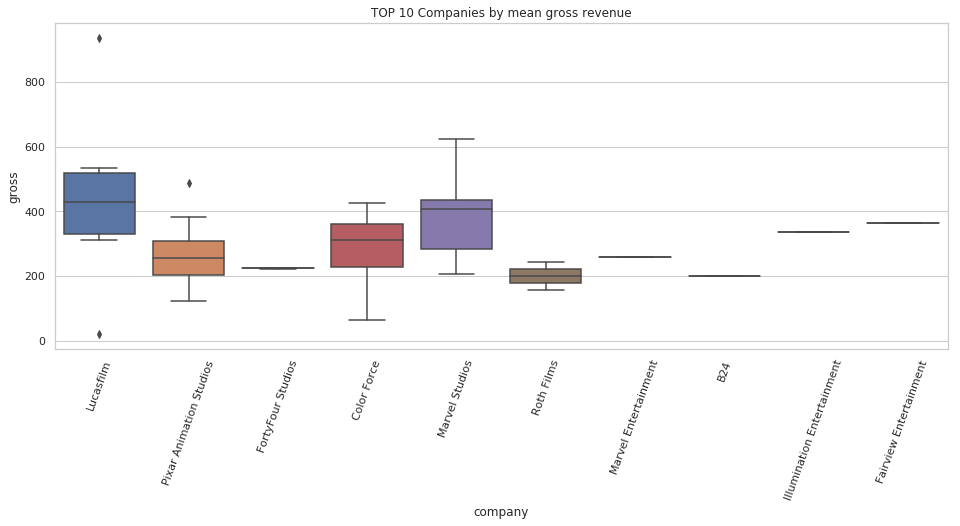

In [0]:
plt.figure(figsize=(16, 6))

top10_company = movies.pivot_table(values='gross', index=['company'], aggfunc='mean').sort_values('gross', ascending=False).head(10)
plt.title('TOP 10 Companies by mean gross revenue')
sns.boxplot('company', 'gross', data=movies[movies['company'].isin(top10_company.index)]);
plt.xticks(rotation=70);

**Identify TOP 10 companies by Total Gross Revenue**

In [0]:
top10_company = movies.pivot_table(values='gross', index=['company'], aggfunc='mean').sort_values('gross', ascending=False).head(10)
top10_company

,gross
company,
Lucasfilm,442.329167
Marvel Studios,381.663254
Fairview Entertainment,364.001123
Illumination Entertainment,336.045770
Color Force,276.882865
Pixar Animation Studios,270.168731
Marvel Entertainment,259.766572
FortyFour Studios,223.167996
B24,200.074175


**Undestand the distribution of data for TOP 10 companies by Total Gross Revenue**

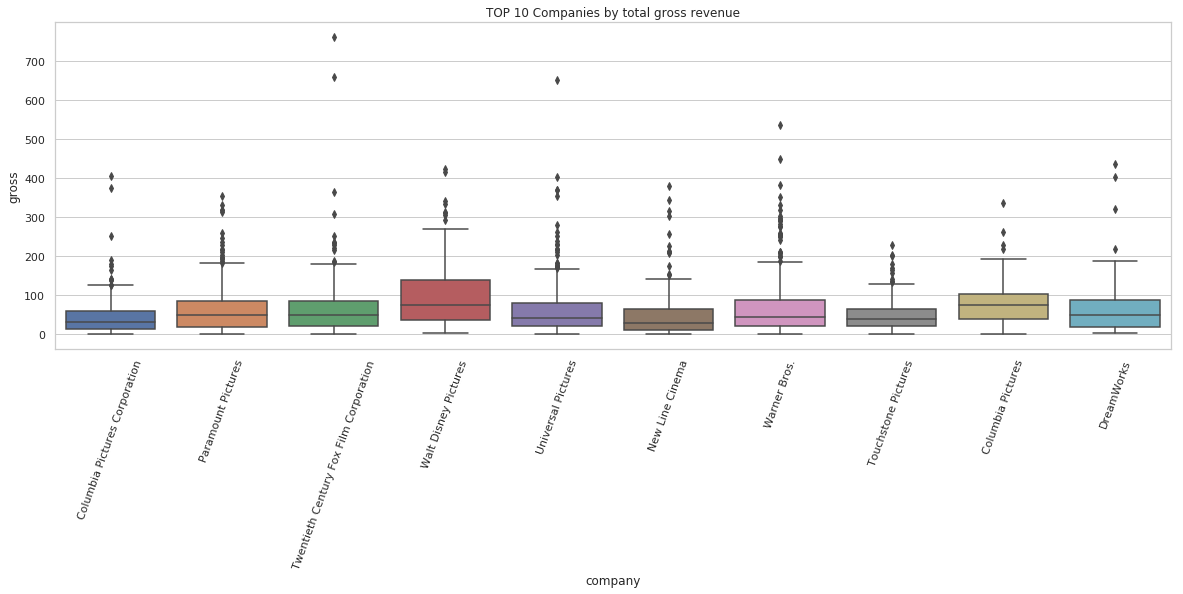

In [0]:
plt.figure(figsize=(20, 6))

top10_company = movies.pivot_table(values='gross', index=['company'], aggfunc='sum').sort_values('gross', ascending=False).head(10)

plt.title('TOP 10 Companies by total gross revenue')

sns.boxplot('company', 'gross', data=movies[movies['company'].isin(top10_company.index)]);

plt.xticks(rotation=70);

**Comparing Marvel's revenues, profits and budgets**

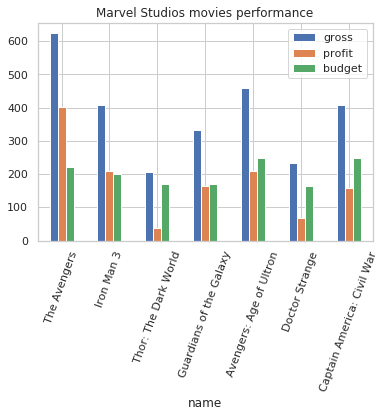

In [0]:
marvel=movies[movies['company'].str.match('Marvel Studios')]

marvel['profit'] = marvel['gross'] - marvel['budget']

marvel.plot(x='name', y=['gross', 'profit', 'budget'], kind='bar')

plt.title('Marvel Studios movies performance')

plt.xticks(rotation=70);

**Taking a closer look at movies from 2010-2016**

In [0]:
z=movies[movies['year'].between(2010, 2016, inclusive=True)]

z.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,month
5280,160.0,Warner Bros.,USA,Christopher Nolan,Action,292.576195,Inception,PG-13,2010-07-16,148,8.8,Leonardo DiCaprio,1629342,Christopher Nolan,2010,Jul
5281,13.0,Fox Searchlight Pictures,USA,Darren Aronofsky,Drama,106.954678,Black Swan,R,2010-12-17,108,8.0,Natalie Portman,594148,Mark Heyman,2010,Dec
5282,60.0,Universal Pictures,USA,Edgar Wright,Action,31.494270,Scott Pilgrim vs. the World,PG-13,2010-08-13,112,7.5,Michael Cera,302029,Michael Bacall,2010,Aug
5283,80.0,Paramount Pictures,USA,Martin Scorsese,Mystery,128.012934,Shutter Island,R,2010-02-19,138,8.1,Leonardo DiCaprio,883895,Laeta Kalogridis,2010,Feb
5284,0.0,Warner Bros.,UK,David Yates,Adventure,295.983305,Harry Potter and the Deathly Hallows: Part 1,PG-13,2010-11-19,146,7.7,Daniel Radcliffe,368576,Steve Kloves,2010,Nov


**Mean revenue per studio and benchmarking against Marvel Studios**

In [0]:
twentyten = z.pivot_table(values='gross', index=['company'], aggfunc=['mean', 'count']).sort_values(('mean', 'gross'), ascending=False).head(10)

twentyten['marvel_ratio'] = twentyten[('mean', 'gross')] / twentyten.loc['Marvel Studios'][('mean', 'gross')]

twentyten

,mean,count,marvel_ratio
,gross,gross,
company,,,
Lucasfilm,734.419775,2,1.924261
Marvel Studios,381.663254,7,1.000000
Fairview Entertainment,364.001123,1,0.953723
Illumination Entertainment,336.045770,1,0.880477
Pixar Animation Studios,321.948131,3,0.843540
Eon Productions,304.360277,1,0.797458
Color Force,276.882865,4,0.725464
Walt Disney Animation Studios,259.934969,4,0.681058


**Comparing Marvel with largest studios by gross revenue**

In [0]:
twentyten = z.pivot_table(values='gross', index=['company'], aggfunc=['sum', 'count'])

twentyten['avg_per_movie'] = twentyten[('sum', 'gross')] / twentyten[('count', 'gross')]

twentyten['marvel_ratio'] = twentyten[('sum', 'gross')] / twentyten.loc['Marvel Studios'][('sum', 'gross')]

twentyten.sort_values(('sum', 'gross'), ascending=False).head(10)

,sum,count,avg_per_movie,marvel_ratio
,gross,gross,,
company,,,,
Warner Bros.,6121.903008,52,117.728904,2.291438
Universal Pictures,5929.740643,60,98.829011,2.219511
Paramount Pictures,5262.896619,46,114.410796,1.969910
Columbia Pictures,5172.849727,59,87.675419,1.936206
Twentieth Century Fox Film Corporation,3995.736728,41,97.456993,1.495610
Walt Disney Pictures,3529.963446,26,135.767825,1.321271
Marvel Studios,2671.642781,7,381.663254,1.000000
New Line Cinema,2170.318688,25,86.812748,0.812354


##Regression Model

###Preprocessing

** Dropping data points for non-USA movies **

In [0]:
# drop non-USA rows
movies = movies[movies['country'] == 'USA']
movies = movies.drop(['country'], axis=1)
movies.shape

(4872, 15)

**Creating data point for the new movie**

In [0]:
# Movie info collected from https://www.imdb.com/title/tt4154796/
avengers_endgame = pd.DataFrame([[400, 'Marvel Studios', 'Anthony Russo', 'Action',
                                  0.00, 'Avengers: Endgame', 'PG-13', '2019-04-26', 
                                  181, 9.0, 'Robert Downey Jr.', 272986, 'Christopher Markus', 
                                  '2019', 'Apr']], columns=movies.columns)

movies = movies.append(avengers_endgame)

movies.tail()

,budget,company,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,month
6814,20.0,LD Entertainment,Kevin Reynolds,Action,36.874745,Risen,PG-13,2016-02-19,107,6.3,Joseph Fiennes,19084,Kevin Reynolds,2016,Feb
6816,0.0,Siempre Viva Productions,Paul Duddridge,Drama,0.028368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,May
6817,3.5,Warner Bros. Animation,Sam Liu,Animation,3.775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,Jul
6818,0.0,Borderline Presents,Nicolas Pesce,Drama,0.025981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016,Dec
0,400.0,Marvel Studios,Anthony Russo,Action,0.000000,Avengers: Endgame,PG-13,2019-04-26,181,9.0,Robert Downey Jr.,272986,Christopher Markus,2019,Apr


**Resetting datafram index**

In [0]:
movies['released'] =  pd.to_datetime(movies['released'], format='%Y-%m-%d')
movies.set_index('released', inplace=True)

movies['2016'].head()

,budget,company,director,genre,gross,name,rating,runtime,score,star,votes,writer,year,month
released,,,,,,,,,,,,,,
2016-02-19,3.5,Parts and Labor,Robert Eggers,Horror,25.138292,The Witch,R,92,6.8,Anya Taylor-Joy,111384,Robert Eggers,2015,Feb
2016-04-08,0.0,Gamechanger Films,Karyn Kusama,Drama,0.231703,The Invitation,NOT RATED,100,6.7,Logan Marshall-Green,46822,Phil Hay,2015,Apr
2016-04-08,10.0,Black Label Media,Jean-Marc Vallée,Comedy,1.978592,Demolition,R,101,7.0,Jake Gyllenhaal,64109,Bryan Sipe,2015,Apr
2016-05-13,5.0,Broad Green Pictures,Jeremy Saulnier,Crime,3.219029,Green Room,R,95,7.0,Anton Yelchin,69349,Jeremy Saulnier,2015,May
2016-03-04,0.0,Dogwood Films,Terrence Malick,Drama,0.558402,Knight of Cups,R,118,5.7,Christian Bale,18771,Terrence Malick,2015,Mar


In [0]:
# Exclude any companies with less than 5 movies
movies_per_company = movies.pivot_table(values='name', index=['company'], aggfunc='count').sort_values('name', ascending=True)
movies_per_company = movies_per_company[movies_per_company['name'] >= 5]

movies = movies[movies['company'].isin(movies_per_company.index)]
print(movies.shape)

movies.tail()

(3189, 14)


,budget,company,director,genre,gross,name,rating,runtime,score,star,votes,writer,year,month
released,,,,,,,,,,,,,,
2016-03-25,18.0,Gold Circle Films,Kirk Jones,Comedy,59.573085,My Big Fat Greek Wedding 2,PG-13,94,6.0,Nia Vardalos,22142,Nia Vardalos,2016,Mar
2016-05-13,4.0,Blumhouse Productions,Greg McLean,Horror,10.732841,The Darkness,PG-13,92,4.4,Kevin Bacon,9450,Greg McLean,2016,May
2016-10-07,8.5,CBS Films,Steve Carr,Animation,19.985196,Middle School: The Worst Years of My Life,PG,92,6.1,Griffin Gluck,4556,Chris Bowman,2016,Oct
2016-02-19,20.0,LD Entertainment,Kevin Reynolds,Action,36.874745,Risen,PG-13,107,6.3,Joseph Fiennes,19084,Kevin Reynolds,2016,Feb
2019-04-26,400.0,Marvel Studios,Anthony Russo,Action,0.000000,Avengers: Endgame,PG-13,181,9.0,Robert Downey Jr.,272986,Christopher Markus,2019,Apr


In [0]:
# drop unnecessary columns
movies = movies.drop(['name', 'genre', 'rating', 'runtime', 'score', 'director'], axis=1)
movies = pd.get_dummies(movies, columns=['month', 'company', 'star', 'writer'], drop_first=True)

print(movies.shape)
movies.tail()

(3189, 3415)


,budget,gross,votes,year,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,...,writer_Yann Martel,writer_Zach Cregger,writer_Zach Helm,writer_Zack Snyder,writer_Zak Penn,writer_Zeke Richardson,writer_Ziggy Steinberg,writer_Zoe Kazan,writer_Àlex Pastor,writer_Émile Gaudreault
released,,,,,,,,,,,,,,,,,,,,,
2016-03-25,18.0,59.573085,22142,2016,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-05-13,4.0,10.732841,9450,2016,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-10-07,8.5,19.985196,4556,2016,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-02-19,20.0,36.874745,19084,2016,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-04-26,400.0,0.000000,272986,2019,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
movies_avengers = movies['2019-04-26']
print(movies_avengers.shape)

movies = movies['1900':'2018']
print(movies.shape)

(1, 3415)
(3188, 3415)


In [0]:
X = movies.drop('gross', axis=1)
print(X.shape)

X_avengers = movies_avengers.drop('gross', axis=1)
print(X_avengers.shape)

y = movies['gross']
print(y.shape)

(3188, 3414)
(1, 3414)
(3188,)


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 700)

### Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

# Create a linear regression object: reg
reg = LinearRegression()

reg.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = reg.predict(X_test)

print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

-14545139611.46843
62031198693730.414


In [0]:
# Predict for the avengers movie
y_pred_avengers = reg.predict(X_avengers)
print(y_pred_avengers)

[-1087255.58487057]


### Elastic Net

In [0]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=10)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.5470993773246344
Tuned ElasticNet MSE: 1931.5021555109054


In [0]:
# Predict for the avengers movie
y_pred_avengers = gm_cv.predict(X_avengers)
print(y_pred_avengers)

[388.26466302]


### KNN Model

In [0]:
from sklearn.neighbors import KNeighborsRegressor

n_neighbors = 5

knn = KNeighborsRegressor(n_neighbors, weights='uniform')

knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

print(knn.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))

0.34448334395628777
62031198693730.414


In [0]:
# Predict for the avengers movie
y_pred_avengers = knn.predict(X_avengers)
print(y_pred_avengers)

[136.6006592]


##Conclusion

According to the model, the estimated gross revenue will be 1.3 billion dollars. It is about the same amount as the actual opening box office sales. 
Other professional like business insider says it will be 3 billion. However, we can confidently say the Avengers are going to be very profitable!!